In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#read excel
df = pd.read_excel('/workspaces/master_thesis/Master_thesis_results_1806_prefilled (2).xlsx', sheet_name='Sheet1')

In [9]:
#delete last raw
df = df[:-1]

In [14]:
df

,Source,Poincare_concept_id,Poincare_concept_name,Score,Poincare_domain_id,Poincare_score,DeepWalk_concept_id,DeepWalk_concept_name,Unnamed: 8,DeepWalk_domain_id,DeepWalk_score,TF-IDF_concept_id,TF-IDF_concept_name,Unnamed: 13,TF-IDF_domain_id,TF-IDF_score,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,What artery was this detected at?,4114166.0,Systemic arterial finding,4.0,Condition,0.603746,4114166.0,Systemic arterial finding,4.0,Condition,0.875879,4219729.0,ability to detect odor,0.0,Observation,0.640942,NaN,NaN,NaN
1,What artery was this detected at?,4042836.0,Disorder of head,0.0,Condition,0.732165,4095634.0,Venous finding,3.0,Condition,0.842248,4210550.0,detect - error detection,0.0,Measurement,0.635013,5.0,NaN,This color represents a perfect match. The con...
2,What artery was this detected at?,321887.0,Disorder of artery,4.0,Condition,0.737198,4095631.0,Arterial finding,4.0,Condition,0.833645,4162819.0,toxoplasma nucleic acid detect,0.0,Synonym,0.600570,4.0,NaN,This color represents a 50/50 match. The conce...
3,What artery was this detected at?,321052.0,Peripheral vascular disease,4.0,Condition,0.739125,40484044.0,Surgically constructed radioulnar arteriovenou...,3.0,Condition,0.830968,4134741.0,meningococcal nucl acid detect,0.0,Synonym,0.532636,3.0,NaN,This color represents an off-target match that...
4,What artery was this detected at?,4115390.0,Mediastinal finding,0.0,Condition,0.758339,4207595.0,Surgically constructed ulnar to cephalic arter...,3.0,Condition,0.824887,40483592.0,fatty acid profile to detect peroxisomal defect,0.0,Measurement,0.492036,0.0,NaN,This color represents a wrong match. The conce...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Sclerosis of the mitral valve,4048213.0,Heart valve stenosis and regurgitation,3.0,Condition,1.459595,4281749.0,Heart valve disorder,4.0,Condition,0.938245,4220765.0,mitral valve sclerosis,5.0,Condition,1.000000,NaN,NaN,NaN
91,Sclerosis of the mitral valve,4189343.0,Aortic valve stenosis,3.0,Condition,1.467915,319843.0,Mitral valve disorder,4.0,Condition,0.910050,4237831.0,mitral valve,4.0,Synonym,0.759840,NaN,NaN,NaN
92,Sclerosis of the mitral valve,4158911.0,Non-rheumatic heart valve disorder,4.0,Condition,1.501683,4230774.0,Heart valve regurgitation,3.0,Condition,0.904680,319843.0,mitral valve disorder,4.0,Condition,0.717271,NaN,NaN,NaN
93,Sclerosis of the mitral valve,315273.0,Mitral valve stenosis,4.0,Condition,1.530830,40491478.0,Abnormality of aortic valve,3.0,Condition,0.904239,4117129.0,mitral valve finding,4.0,Condition,0.705246,NaN,NaN,NaN


In [10]:
poincare = df['Score'].to_list()
deepwalk = df['Unnamed: 8'].to_list()
tfidf = df['Unnamed: 13'].to_list()

In [22]:
tfidf_similarity = df['TF-IDF_score'].to_list()
deepwalk_similarity = df['DeepWalk_score'].to_list()
poincare_similarity = df['Poincare_score'].to_list()

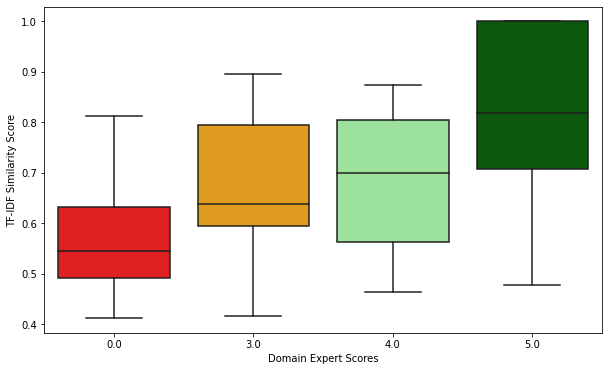

In [23]:
# Create a DataFrame
import pandas as pd
data = pd.DataFrame({'Domain Expert Scores': tfidf, 'TF-IDF Similarity Score': tfidf_similarity})
# Define colors for each TF-IDF score
colors = {0: 'red', 3: 'orange', 4: 'lightgreen', 5: 'darkgreen'}


# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Domain Expert Scores', y='TF-IDF Similarity Score', data=data, palette= colors)
#plt.title('Distribution of Similarity Scores (Cosine Similarity) for Each Evaluation scores assigned by the domain expert')
plt.show()

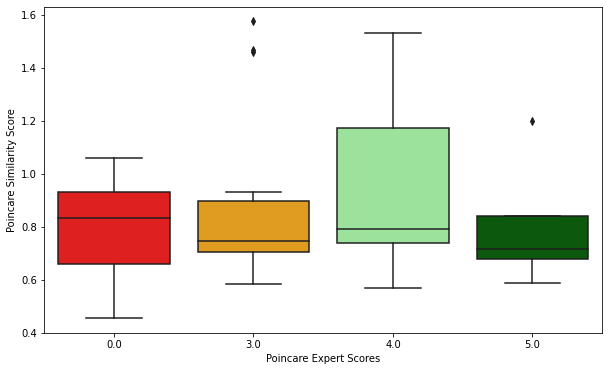

In [27]:
data = pd.DataFrame({'Poincare Expert Scores': poincare, 'Poincare Similarity Score': poincare_similarity})
# Define colors for each TF-IDF score
colors = {0: 'red', 3: 'orange', 4: 'lightgreen', 5: 'darkgreen'}


# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Poincare Expert Scores', y='Poincare Similarity Score', data=data, palette= colors)
#plt.title('Distribution of Similarity Scores (Cosine Similarity) for Each Evaluation scores assigned by the domain expert')
plt.show()

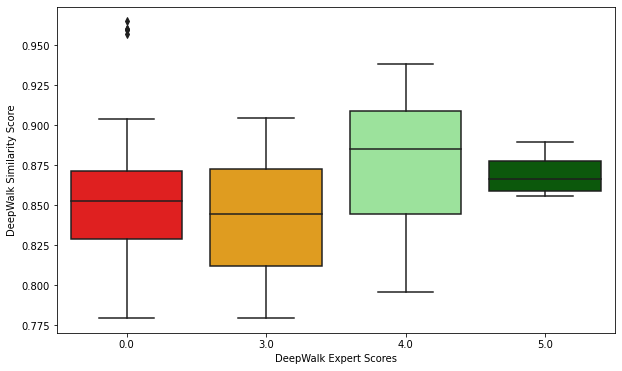

In [25]:
data = pd.DataFrame({'DeepWalk Expert Scores': deepwalk, 'DeepWalk Similarity Score': deepwalk_similarity})
# Define colors for each TF-IDF score
colors = {0: 'red', 3: 'orange', 4: 'lightgreen', 5: 'darkgreen'}


# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='DeepWalk Expert Scores', y='DeepWalk Similarity Score', data=data, palette= colors)
#plt.title('Distribution of Similarity Scores (Cosine Similarity) for Each Evaluation scores assigned by the domain expert')
plt.show()

In [ ]:
data = pd.DataFrame({'Scores': tfidf, 'Similarity Score': tfidf_similarity})
# Define colors for each TF-IDF score
colors = {0: 'red', 3: 'orange', 4: 'lightgreen', 5: 'darkgreen'}


# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='TF-IDF Scores', y='Similarity Score', data=data, palette= colors)
#plt.title('Distribution of Similarity Scores (Cosine Similarity) for Each Evaluation scores assigned by the domain expert')
plt.show()

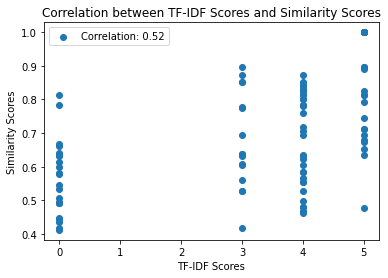

In [16]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
correlation, _ = pearsonr(tfidf, tfidf_similarity)

# Plot the data
plt.scatter(tfidf, tfidf_similarity, label=f'Correlation: {correlation:.2f}')
plt.xlabel('TF-IDF Scores')
plt.ylabel('Similarity Scores')
plt.title('Correlation between TF-IDF Scores and Similarity Scores')
plt.legend()
plt.show()

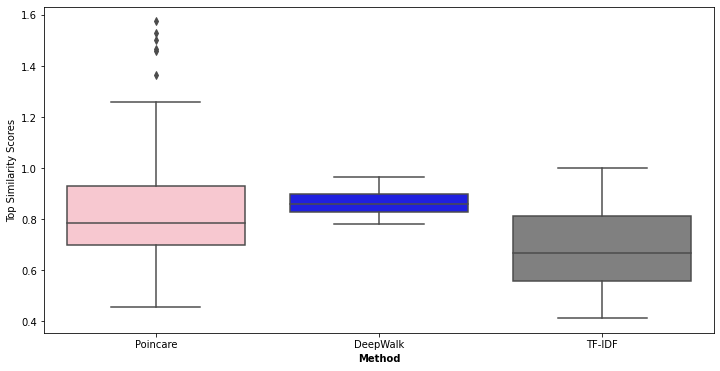

In [31]:
data = {
    'Top Similarity Scores': poincare_similarity + deepwalk_similarity + tfidf_similarity,
    'Method': ['Poincare']*len(poincare_similarity) + ['DeepWalk']*len(deepwalk_similarity) + ['TF-IDF']*len(tfidf_similarity)
}

df_plot = pd.DataFrame(data)

colors = {'Poincare': 'pink', 'DeepWalk': 'blue', 'TF-IDF':'grey'}

plt.figure(figsize=(12, 6))
# Create a boxplot
sns.boxplot(x='Method', y='Top Similarity Scores', data=df_plot , palette=colors)
plt.xlabel('Method', fontweight='bold') 
#plt.title('Distribution of Top 5 Similarity Scores from Poincare, DeepWalk and TF-IDF of suggested SNOMED concepts for 19 selected HCHS medical phases')
plt.show()

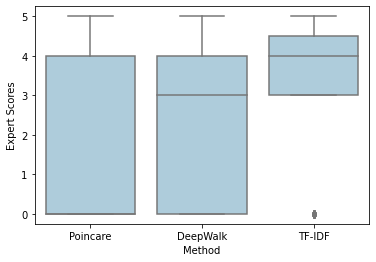

In [29]:
data = {
    'Expert Scores': poincare + deepwalk + tfidf,
    'Method': ['Poincare']*len(poincare) + ['DeepWalk']*len(deepwalk) + ['TF-IDF']*len(tfidf)
}

df_plot_new = pd.DataFrame(data)


# Create a boxplot
sns.boxplot(x='Method', y='Expert Scores', data=df_plot_new , color='#a6cee3')
#plt.title('Distribution of Top 5 Similarity Scores from Poincare, DeepWalk and TF-IDF of suggested SNOMED concepts for 19 selected HCHS medical phases')
plt.show()

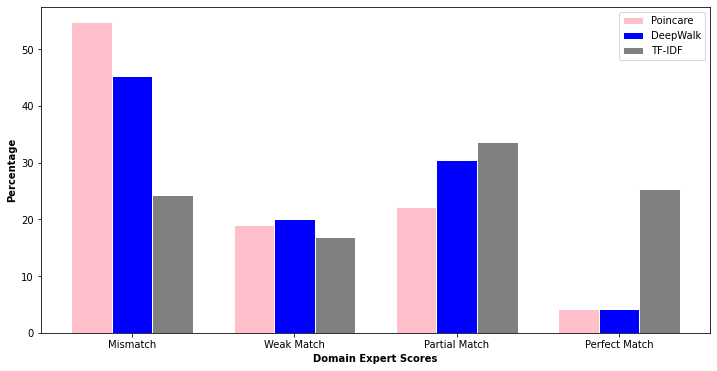

In [13]:
# Function to calculate the percentage of occurrences for each score
def calculate_percentage(scores):
    percentages = []
    for score in [0, 3, 4, 5]:
        percentages.append(scores.count(score) / len(scores) * 100)
    return percentages

# Calculate the percentages
poincare_percent = calculate_percentage(poincare)
deepwalk_percent = calculate_percentage(deepwalk)
tfidf_percent = calculate_percentage(tfidf)

# Define the labels and colors
labels = ['Mismatch', 'Weak Match', 'Partial Match', 'Perfect Match']
colors = ['pink', 'blue', 'grey']

# Set the bar width
bar_width = 0.25
# Set the figure size (width, height)
plt.figure(figsize=(12, 6))

# Set the positions for the bars
r = np.arange(len(labels))
# Create the bars
plt.bar(r, poincare_percent, color='pink', width=bar_width, edgecolor='white', label='Poincare')
plt.bar(r + bar_width, deepwalk_percent, color='blue', width=bar_width, edgecolor='white', label='DeepWalk')
plt.bar(r + 2 * bar_width, tfidf_percent, color='grey', width=bar_width, edgecolor='white', label='TF-IDF')

# Add labels and title
plt.xlabel('Domain Expert Scores', fontweight='bold')
plt.xticks(r + bar_width, labels)
plt.ylabel('Percentage', fontweight='bold')

# Create a legend
plt.legend()

# Show the plot
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (95,).

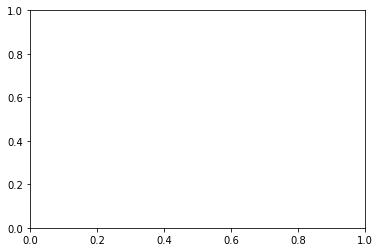

In [20]:
# Function to calculate the percentage of each score
def calculate_percentage(scores):
    total = sum(scores)
    return [x / total * 100 for x in scores]

# Calculate the percentages
poincare_percent = calculate_percentage(poincare)
deepwalk_percent = calculate_percentage(deepwalk)
tfidf_percent = calculate_percentage(tfidf)

# Define the labels and colors
labels = ['Score 5', 'Score 4', 'Score 3', 'Score 0']
colors = ['darkgreen', 'limegreen', 'orange', 'red']

# Set the bar width
bar_width = 0.25

# Set the positions for the bars
r = np.arange(len(labels))

# Create the bars
plt.bar(r, poincare_percent, color='darkgreen', width=bar_width, edgecolor='white', label='Poincare')
plt.bar(r + bar_width, deepwalk_percent, color='limegreen', width=bar_width, edgecolor='white', label='DeepWalk')
plt.bar(r + 2 * bar_width, tfidf_percent, color='orange', width=bar_width, edgecolor='white', label='TF-IDF')

# Add labels and title
plt.xlabel('Scores', fontweight='bold')
plt.xticks(r + bar_width, labels)
plt.ylabel('Percentage')
plt.title('Comparison of Domain Expert Scores')

# Create a legend
plt.legend()

# Show the plot
plt.show()

ValueError: The number of FixedLocator locations (95), usually from a call to set_ticks, does not match the number of ticklabels (4).

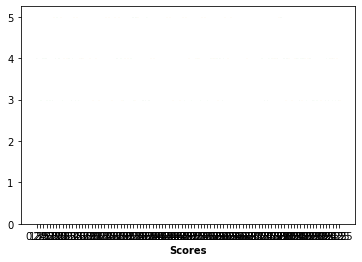

In [6]:
# Set the bar width
bar_width = 0.25

# Set the positions for the bars
r1 = range(len(poincare))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars
plt.bar(r1, poincare, color=colors[0], width=bar_width, edgecolor='white', label='Poincare')
plt.bar(r2, deepwalk, color=colors[1], width=bar_width, edgecolor='white', label='DeepWalk')
plt.bar(r3, tfidf, color=colors[2], width=bar_width, edgecolor='white', label='TF-IDF')

# Add labels and title
plt.xlabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(poincare))], labels)
plt.ylabel('Count')
plt.title('Comparison of Domain Expert Scores')

# Create a legend
plt.legend()

# Show the plot
plt.show()